In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
shots_psa = pd.read_csv('./assets/mpd/shots_train_psa.csv')

shots_psa.PSA = shots_psa.PSA.astype(str)
shots_psa = pd.get_dummies(shots_psa, columns=['Type'])
shots_psa.Date = pd.to_datetime(shots_psa.Date)
shots_psa.drop('index', axis=1, inplace=True)

shots_psa.head()

,Date,PSA,Type_Gunshot_or_Firecracker,Type_Multiple_Gunshots,Type_Single_Gunshot
0,2014-01-01,501,0,1,0
1,2014-01-01,502,0,1,0
2,2014-01-01,505,0,1,0
3,2014-01-01,708,0,1,0
4,2014-01-01,107,0,1,0


In [12]:
def mnth_yr(df):
    df = df.copy()
    df['mnth_yr'] = df.Date.dt.to_period('M')
    df.drop(['Date'], axis=1, inplace=True)
    return df

my_psa = mnth_yr(shots_psa)

In [13]:
my_psa = my_psa.groupby(['PSA', 'mnth_yr'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')

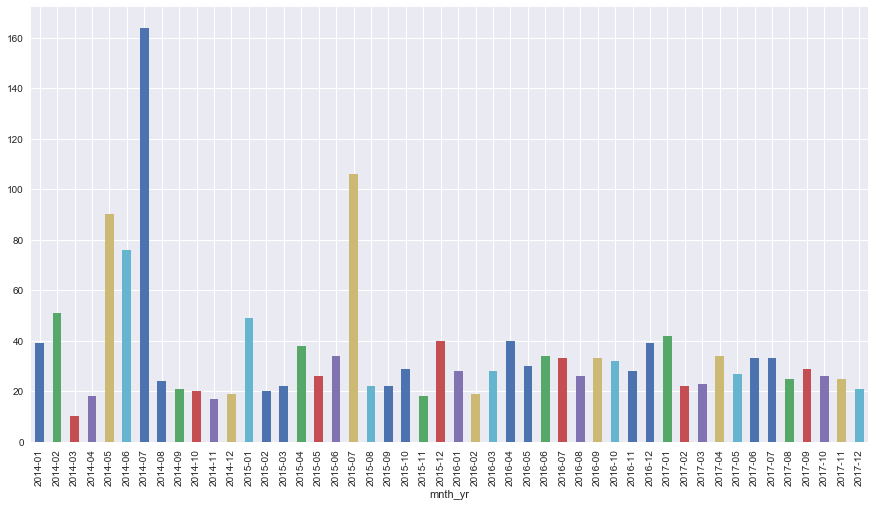

In [14]:
plt.figure(figsize=(15, 8))
foo = my_psa.reset_index()
for bar in foo['PSA'].unique():
    foo[foo['PSA'] == bar].set_index('mnth_yr')['Type_Multiple_Gunshots'].plot(kind='bar')

In [15]:
def date_separate(df):
    df = df.copy()
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
#     df['Day'] = pd.DatetimeIndex(df['Date']).day
    df.drop(['Date'], axis=1, inplace=True)
    return df

shots_psa = date_separate(shots_psa)

In [16]:
psa_month = shots_psa.groupby(['PSA', 'Month'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')

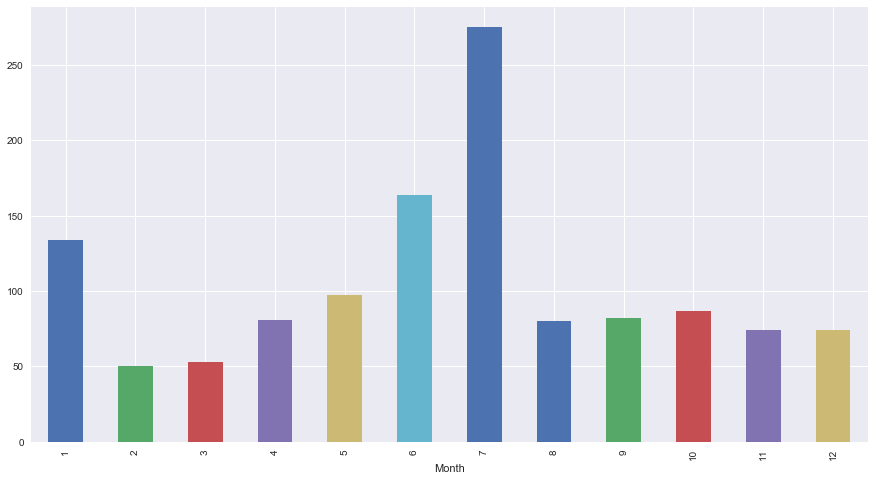

In [17]:
plt.figure(figsize=(15, 8))
foo = psa_month.reset_index()
for bar in foo['PSA'].unique():
    foo[foo['PSA'] == bar].set_index('Month')['Type_Multiple_Gunshots'].plot(kind='bar')

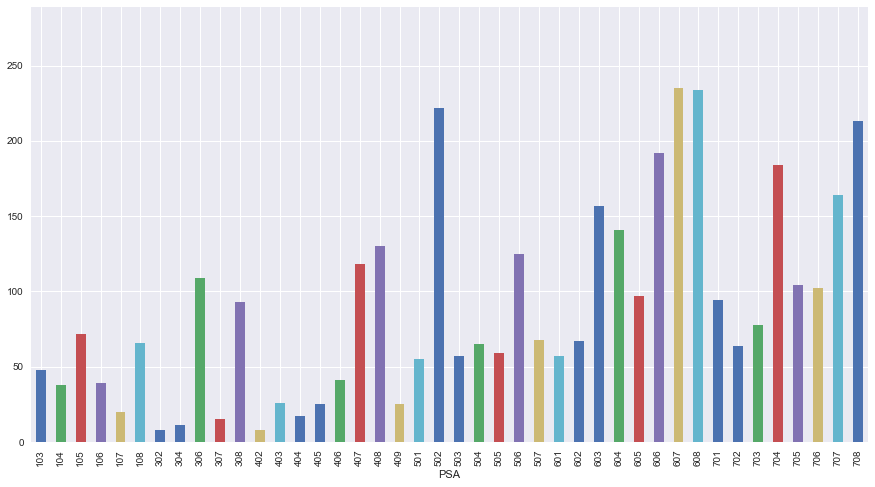

In [18]:
plt.figure(figsize=(15, 8))
foo = psa_month.reset_index()
for bar in foo['Month'].unique():
    foo[foo['Month'] == bar].set_index('PSA')['Type_Multiple_Gunshots'].plot(kind='bar')

In [19]:
shots_psa2014 = shots_psa[shots_psa.Year == 2014]
shots_psa2015 = shots_psa[shots_psa.Year == 2015]
shots_psa2016 = shots_psa[shots_psa.Year == 2016]
shots_psa2017 = shots_psa[shots_psa.Year == 2017]

In [21]:
def year_process(df):
    df = df.groupby(['Month'])['Type_Multiple_Gunshots', 'Type_Single_Gunshot'].agg('sum')
    df = df.reset_index()
    return df

shots_psa2014 = year_process(shots_psa2014)
shots_psa2015 = year_process(shots_psa2015)
shots_psa2016 = year_process(shots_psa2016)
shots_psa2017 = year_process(shots_psa2017)

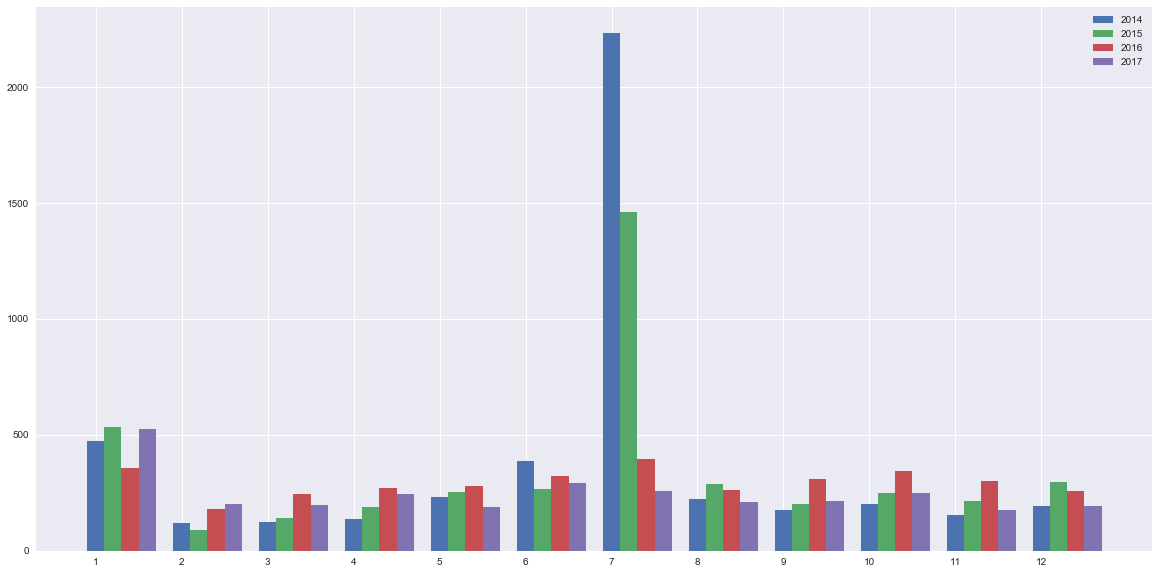

In [22]:
width = 0.2

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(shots_psa2014.Month+0.00, height=shots_psa2014.Type_Multiple_Gunshots, width=width, label='2014')
plt.bar(shots_psa2015.Month+0.2, height=shots_psa2015.Type_Multiple_Gunshots, width=width, label='2015')
plt.bar(shots_psa2016.Month+0.40, height=shots_psa2016.Type_Multiple_Gunshots, width=width, label='2016')
plt.bar(shots_psa2017.Month+0.6, height=shots_psa2017.Type_Multiple_Gunshots, width=width, label='2017')
plt.xticks(shots_psa2014.Month)
plt.legend();

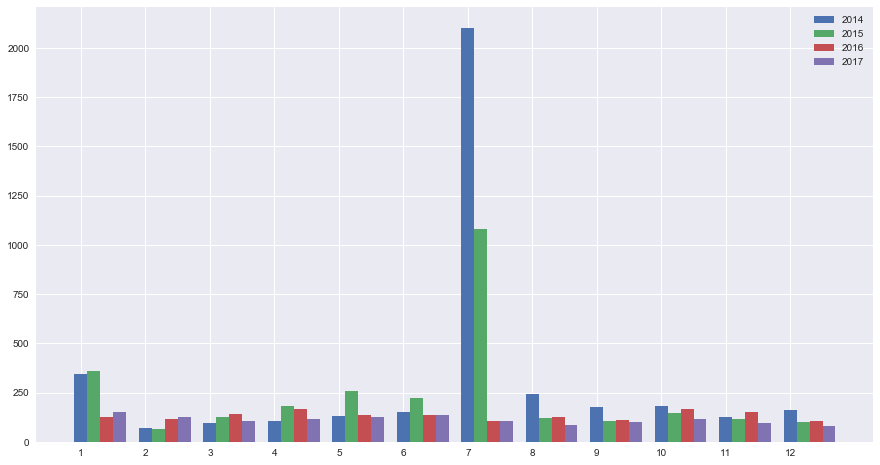

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(shots_psa2014.Month+0.00, height=shots_psa2014.Type_Single_Gunshot, width=width, label='2014')
plt.bar(shots_psa2015.Month+0.2, height=shots_psa2015.Type_Single_Gunshot, width=width, label='2015')
plt.bar(shots_psa2016.Month+0.40, height=shots_psa2016.Type_Single_Gunshot, width=width, label='2016')
plt.bar(shots_psa2017.Month+0.6, height=shots_psa2017.Type_Single_Gunshot, width=width, label='2017')
plt.xticks(shots_psa2014.Month)
plt.legend();